# matplotlib 入門 (12) nitta@tsuda.ac.jp

# Chapter 12: Bar Graph (2)

## 12-1: Generate a normal distribution histogram and draw the lines of probability density <code>his</code>
<pre>
    Axes.hist(x,
              bins=None,  # number of bin(class)
              range=None,  # lower and upper limits of class
              density=None,  # frequency if False, probability otherwise. 
                             #The return value is F (list of values, list of lower bounds, patch object)
              histtype='bar', # type of bar (bar/barstacked/step/stepfilled)
              align='mid',    # position of bar (left/mid/right)
              orientation='vertical', # bar orientation (horizontal/vertical)
              color=None,
              **kwargs   # specify the properties of Patch class
             )
</pre>

Normal distribution probability density function

$\displaystyle
f(x) = \frac{1}{\sqrt{2\pi \rho}}
e^{\frac{(x - \mu)^2}{2 \sigma^2}}
$<br />
where $\mu$: the average, $\sigma^{2}$: the variance.

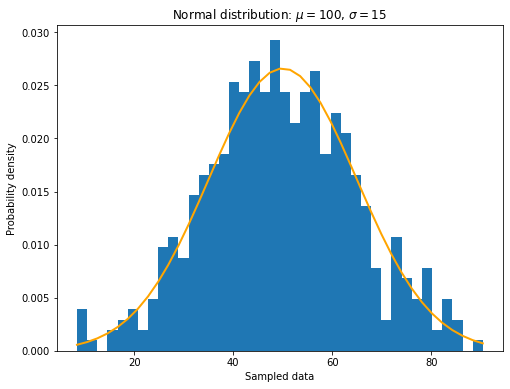

In [ ]:
# sample code 12-1
# Generate histogram and draw a line for the probability density function
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

mean = 50.
std_dev = 15.   # standard deviation

def f(x, mean, std_dev):
    return 1./(np.sqrt(2*np.pi) * std_dev) * np.exp(-(x - mean)**2/(2 * std_dev * std_dev))

data = np.random.normal(mean, std_dev, 500)   # prepare 500 data
n_bins = 40   # number of classes

fig, ax = plt.subplots(1, 1, figsize=(8,6))

n, bins, patches = ax.hist(
    data,
    n_bins,
    density=True,  # probability
)

# draw probability density function
y = f(bins, mean, std_dev)
ax.plot(bins, y, linewidth=2, color="orange")

# display label of axis and title
ax.set_xlabel('Sampled data')
ax.set_ylabel('Probability density')
ax.set_title(r'Normal distribution: $\mu=100$, $\sigma=15$')

plt.show()

## 12-2: Bins of different widths are arranged side by side and automatically aggregated and plotted <code>hist</code>

An array of 10 numbers in ascending order 
<pre>
bins = [ 0, 20, 30, 40, 45, 50, 55, 60, 70, 100 ]
</pre>
represents the next 10 bins.
<pre>
     0 - 19
    20 - 29
    30 - 40
    40 - 44
    45 - 49
    50 - 54
    55 - 59
    60 - 69
    70 - 79
    80 - 99
</pre>

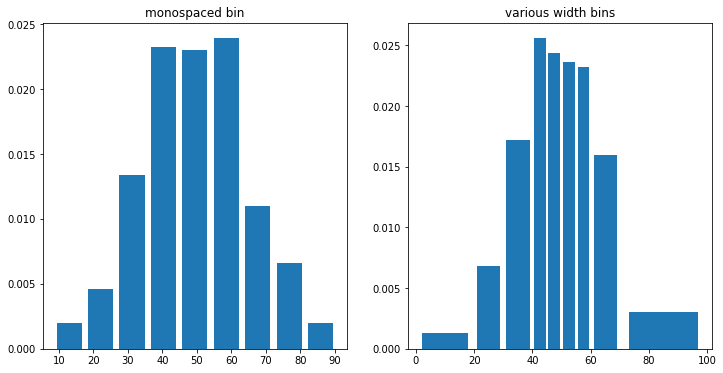

In [ ]:
# sample code 12-2
# Generating a histogram with the number and width of bins
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

mean = 50.
std_dev = 15.   # standard deviation

data = np.random.normal(mean, std_dev, 500)   # prepare 500 data

bins = [ 0, 20, 30, 40, 45, 50, 55, 60, 70, 100 ]
n_bins = len(bins) - 1

fig, ax = plt.subplots(1, 2, figsize=(12,6))

n1, bins1, patches1 = ax[0].hist(
    data,
    n_bins,
    density=True,  # probability
    histtype='bar',
    rwidth=0.8
)
ax[0].set_title('monospaced bin')

n2, bins2, patches2 = ax[1].hist(
    data,
    bins,
    density=True,  # probability
    histtype='bar',
    rwidth=0.8
)
ax[1].set_title('various width bins')

plt.show()

## 12-3: Combine multiple data into one histogram

By increasing the number of bars drawn in the bin of the histogram, the distribution of multiple data can be combined into one graph.

In [ ]:
# explanationof numpy.c_ 
# Slice data to concatenate along the second axis.

import numpy as np
a = np.array([1,2,3])
b = np.array([4,5,6])
c = np.array([7,8,9])

x = np.c_[a]
print(x)
y = np.c_[a,b]
print(y)
z = np.c_[a,b,c]
print(z)

[[1]
 [2]
 [3]]
[[1 4]
 [2 5]
 [3 6]]
[[1 4 7]
 [2 5 8]
 [3 6 9]]


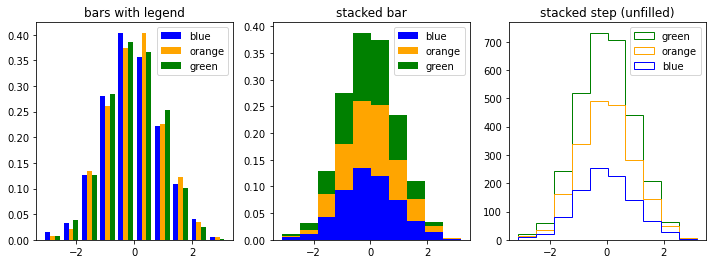

In [ ]:
# sample code 12-3
# Combine 3 types of data into a histogram
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

a = np.random.randn(1000) # mu=0; sigma=1; np.random(mu,sigma,1000)
b = np.random.randn(1000)
c = np.random.randn(1000)
# Concatenate a, b, c in the axis=1 direction
x = np.c_[a,b,c]

# Place a 1x3 grid on the Figure
fig, ax = plt.subplots(1, 3, figsize=(4 * 3,4))

n_bins = 10
colors = ['blue','orange','green']

ax[0].hist(
    x,
    n_bins,
    density=True,
    histtype='bar',
    color=colors,
    label=colors  # legend
)
ax[0].legend(prop={'size':10})  # Display legend
ax[0].set_title('bars with legend')


ax[1].hist(
    x,
    n_bins,
    density=True,
    histtype='bar',
    color=colors,
    label=colors,
    stacked=True   # Stackable bar
)
ax[1].legend(prop={'size':10})
ax[1].set_title('stacked bar')


ax[2].hist(
    x,
    n_bins,
    histtype='step', # Stepped and unfilled
    color=colors,
    label=colors,
    stacked=True     # Stackable bar
)
ax[2].legend()
ax[2].set_title('stacked step (unfilled)')


#fig.tight_layout()
plt.show()

## 12-4: Generate histogram of the cumulative frequency distribution (cumulative probability)

The cumulative frequency distribution can be expressed by adding the frequencies of the bins.
Converts the cumulative frequency to cumulative probability and draws a histogram where the bars are stepped towards brobability 1 (100%).


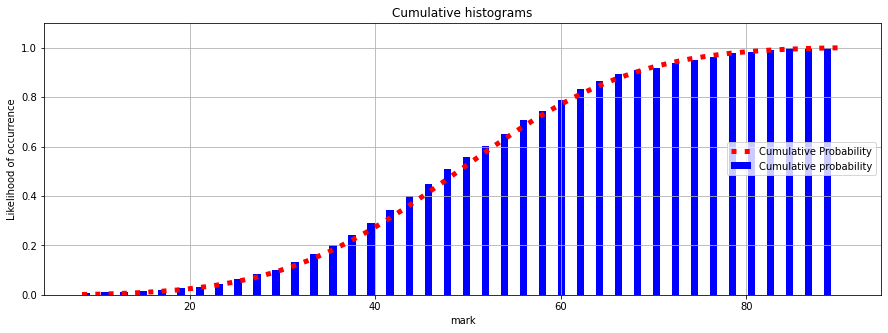

In [ ]:
# sample code 12-4
# Draw a histogram of cumulative probabilities
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

mean = 50.
std_dev = 15.   # standard deviation

def f(x, mean, std_dev):
    return 1./(np.sqrt(2*np.pi) * std_dev) * np.exp(-(x - mean)**2/(2 * std_dev * std_dev))

data = np.random.normal(mean, std_dev, 500)   # prepare 500 data
n_bins = 40   # number of classes

fig, ax = plt.subplots(figsize=(15,5))


n,bins,patches = ax.hist(
    data,
    n_bins,
    width=0.8,
    density=True,  # probability
    histtype='bar', # stepping, no fill
    cumulative=True, # cumulative probability
    color='blue',
    label='Cumulative probability'  # label of legend
)

prob = f(bins, mean, std_dev)
y2 = prob.cumsum() # Calculate cumulative
y2 /= y2[-1]    # Divide by the last value so that the last value is 1.
ax.plot(
    bins,     # x-axis: lower limit of bin
    y2,       # y-axis: cumulative probability
    linestyle='dotted',
    linewidth=5,
    color='red',    # line color
    label='Cumulative Probability' # label of legend
)

# grid, legend, title, label of axis
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative histograms')
ax.set_xlabel('mark')
ax.set_ylabel('Likelihood of occurrence')

ax.set_ylim(0.0, 1.1)

plt.show()
